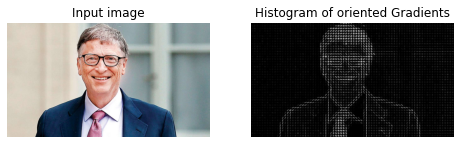

In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import cv2

image=cv2.imread('face1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#fd is feature descriptor(represent image)
fd, hog_image= hog(image,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True)

#plot input and hog image
fig, (ax1, ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

#Rescale histogram for better display
hog_image_rescaled=exposure.rescale_intensity(hog_image,in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram of oriented Gradients')
plt.show()



In [2]:
len(fd)

28800

In [3]:
image.shape

(720, 1280, 3)

In [4]:
import face_recognition
import matplotlib.pyplot as plt

import numpy as np
import cv2 #opencv
%matplotlib inline


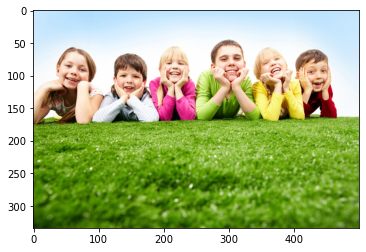

In [5]:
#Load jpg file into a numpy array

image=cv2.imread('face2.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [6]:
#find all faces in image
face_locations=face_recognition.face_locations(image)
number_of_faces=len(face_locations)
print("Found {} face(s) in input image.".format(number_of_faces))

Found 6 face(s) in input image.


A face is located at pixel location Top: 280, Left: 60, Bottom: 323,Right: 103
A face is located at pixel location Top: 415, Left: 79, Bottom: 458,Right: 122
A face is located at pixel location Top: 37, Left: 67, Bottom: 89,Right: 118
A face is located at pixel location Top: 127, Left: 89, Bottom: 170,Right: 132
A face is located at pixel location Top: 197, Left: 70, Bottom: 233,Right: 106
A face is located at pixel location Top: 349, Left: 66, Bottom: 385,Right: 102


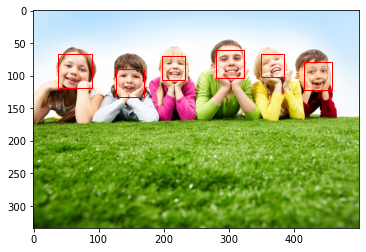

In [7]:
from matplotlib.patches import Rectangle
#get axis handle
plt.imshow(image)
ax=plt.gca()

#repeat for all faces found
for face_location in face_locations:
    #print the location of each face in the image.
    #Each face is list of co-ordinates in (t,r,b,l) order
    top,right,bottom,left=face_location
    x,y,w,h=left,top,right,bottom
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {},Right: {}".format(x,y,w,h))
    #Let's draw a box 
    rect=Rectangle((x,y),w-x,h-y,fill=False,color='red')
    ax.add_patch(rect)
    
#show output image
plt.show()

## Face Recognition

In [8]:
import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [9]:
#Load the known images(Create database)
image=cv2.imread('bill.jpg')
bill = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image=cv2.imread('madhuri.jpg')
madhuri = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image=cv2.imread('virat.jpg')
virat = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [10]:
#encoding part
bill_encoding=face_recognition.face_encodings(bill)[0]
madhuri_encoding=face_recognition.face_encodings(madhuri)[0]
virat_encoding=face_recognition.face_encodings(virat)[0]

#create database of all known faces
known_face_encodings=[
    bill_encoding,
    madhuri_encoding,
    virat_encoding
]

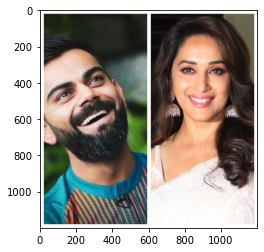

In [11]:
#Load image we want to check
image=cv2.imread('viratmadhuri.jpg')
unknown_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

#get face encodings for any people in picture
unknown_face_encodings=face_recognition.face_encodings(unknown_image)

In [12]:
from scipy.spatial import distance

In [13]:
#there might be more than one person in image, so we need to loop over it
for unknown_face_encoding in unknown_face_encodings:
       #Test if this unknown face encoding matches any one from database
        results=[]
        for known_face_encoding in known_face_encodings:
            d=distance.euclidean(known_face_encoding,unknown_face_encoding)
            #print("Euclidean distance: ",d)
            results.append(d)
        threshold=0.6
        results=np.array(results)<=threshold
        name="Unknown"
        if results[0]:
            name="Bill Gates"
        elif results[1]:
            name="Madhuri Dixit"
        elif results[2]:
            name="Virat Kohli"
        print(f"Found {name} in the photo!")

Found Madhuri Dixit in the photo!
Found Virat Kohli in the photo!
